## Estructura del dataset
Total de registros: 820
Columnas totales: 18
Variables relevantes: síntomas, temperatura, análisis de sangre, y resultado final.

## Diccionario
- id_paciente: ID del paciente, sirve como identificador único para cada registro.
- fecha_inicio_fiebre: Fecha de inicio de la fiebre. Indica cuándo comenzaron los síntomas febriles.
- lugar_residencia:Lugar de residencia del paciente, podría ser útil para análisis geográficos o epidemiológicos.
- dias_con_fiebre: Días desde el inicio de los síntomas. Representa el tiempo que ha pasado desde que el paciente comenzó a presentar signos de la enfermedad.
- temperatura_actual: Temperatura corporal actual del paciente, probablemente en grados Celsius.
- globulos_blancos:Recuento de glóbulos blancos (White Blood Cells). Un valor alterado puede indicar infección o inflamación.
- dolor_cabeza_severo:Presencia de dolor de cabeza severo.
- dolor_detras_ojos: Dolor detrás de los ojos, un síntoma común del dengue. Probablemente también binario.
- dolor_articular_muscular: Dolores articulares y musculares. Otro síntoma característico del dengue.
- sabor_metalico_boca: Sabor metálico en la boca. No es un síntoma tan común, pero puede estar presente.
- perdida_apetito: Pérdida de apetito. Frecuente en pacientes con fiebre o enfermedades virales.
- dolor_abdominal: Dolor abdominal.
- nauseas_vomitos: Náuseas o vómitos. Común en infecciones virales y particularmente en dengue.
- diarrea: Diarrea. Otro síntoma que puede presentarse con el dengue.
- hemoglobina: Nivel de hemoglobina en la sangre. Un nivel bajo puede indicar anemia o hemorragia.
- hematocrito: Mide el porcentaje de glóbulos rojos en la sangre. Importante para detectar concentración de sangre o signos de shock.
- plaquetas:Conteo de plaquetas. En dengue suele disminuir considerablemente, por lo que es un indicador clave.
- dengue: Etiqueta que indica si el paciente fue diagnosticado con dengue o no. Es la variable objetivo (target) para modelos de predicción.

## 1. Carga y preprocesamiento inicial de los datos

In [160]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('dengueSintomas.csv')

print(df.isnull().sum())

id_paciente                 0
fecha_inicio_fiebre         0
dias_con_fiebre             0
temperatura_actual          0
globulos_blancos            0
dolor_cabeza_severo         0
dolor_detras_ojos           0
dolor_articular_muscular    0
sabor_metalico_boca         0
perdida_apetito             0
dolor_abdominal             0
nauseas_vomitos             0
diarrea                     0
hemoglobina                 0
hematocrito                 0
plaquetas                   0
dengue                      0
dtype: int64


In [161]:
# Obtener información sobre las columnas y sus tipos de datos
df.info()

# Verificar la cantidad de valores nulos
df.isnull().sum()

# Ver estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_paciente               1820 non-null   object 
 1   fecha_inicio_fiebre       1820 non-null   object 
 2   dias_con_fiebre           1820 non-null   float64
 3   temperatura_actual        1820 non-null   float64
 4   globulos_blancos          1820 non-null   float64
 5   dolor_cabeza_severo       1820 non-null   object 
 6   dolor_detras_ojos         1820 non-null   object 
 7   dolor_articular_muscular  1820 non-null   object 
 8   sabor_metalico_boca       1820 non-null   object 
 9   perdida_apetito           1820 non-null   object 
 10  dolor_abdominal           1820 non-null   object 
 11  nauseas_vomitos           1820 non-null   object 
 12  diarrea                   1820 non-null   object 
 13  hemoglobina               1820 non-null   float64
 14  hematocr

,dias_con_fiebre,temperatura_actual,globulos_blancos,hemoglobina,hematocrito,plaquetas
count,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000,1820.000000
mean,6.432967,103.087912,3.025000,13.351786,32.080769,96.276374
std,3.601724,21.860645,1.272635,3.142119,7.385822,33.702430
min,1.000000,99.000000,1.000000,7.600000,18.000000,35.000000
25%,4.000000,102.000000,2.100000,10.600000,26.000000,74.000000
50%,6.000000,103.000000,2.950000,13.400000,32.000000,95.000000
75%,8.000000,104.000000,4.000000,15.900000,38.000000,120.000000
max,21.000000,1033.000000,24.000000,19.800000,47.000000,875.000000


In [162]:
# Convertir la columna de fecha en formato datetime
df['fecha_inicio_fiebre'] = pd.to_datetime(df['fecha_inicio_fiebre'], format='%d-%b')

# Convertir las columnas con valores binarios a tipo 'category'
columnas_categoricas = [
    'dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular',
    'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal',
    'nauseas_vomitos', 'diarrea', 'dengue'
]

df[columnas_categoricas] = df[columnas_categoricas].astype('category')

df['dias_con_fiebre'] = df['dias_con_fiebre'].astype('int')

df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1820 entries, 0 to 1819
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_paciente               1820 non-null   object        
 1   fecha_inicio_fiebre       1820 non-null   datetime64[ns]
 2   dias_con_fiebre           1820 non-null   int64         
 3   temperatura_actual        1820 non-null   float64       
 4   globulos_blancos          1820 non-null   float64       
 5   dolor_cabeza_severo       1820 non-null   category      
 6   dolor_detras_ojos         1820 non-null   category      
 7   dolor_articular_muscular  1820 non-null   category      
 8   sabor_metalico_boca       1820 non-null   category      
 9   perdida_apetito           1820 non-null   category      
 10  dolor_abdominal           1820 non-null   category      
 11  nauseas_vomitos           1820 non-null   category      
 12  diarrea             

,id_paciente,fecha_inicio_fiebre,dias_con_fiebre,temperatura_actual,globulos_blancos,dolor_cabeza_severo,dolor_detras_ojos,dolor_articular_muscular,sabor_metalico_boca,perdida_apetito,dolor_abdominal,nauseas_vomitos,diarrea,hemoglobina,hematocrito,plaquetas,dengue
0,P001,1900-01-13,10,100.0,5.0,yes,no,no,yes,yes,yes,no,yes,15.0,21,140,yes
1,P002,1900-02-13,4,104.0,1.0,no,yes,yes,no,no,no,no,no,9.0,22,80,no
2,P003,1900-01-09,5,104.0,4.3,yes,no,no,yes,yes,yes,yes,no,9.3,24,120,yes
3,P004,1900-08-12,12,101.0,1.8,yes,yes,no,no,no,no,no,no,11.2,25,50,no
4,P005,1900-10-12,3,101.0,3.2,yes,no,no,no,no,no,yes,no,13.6,22,95,no


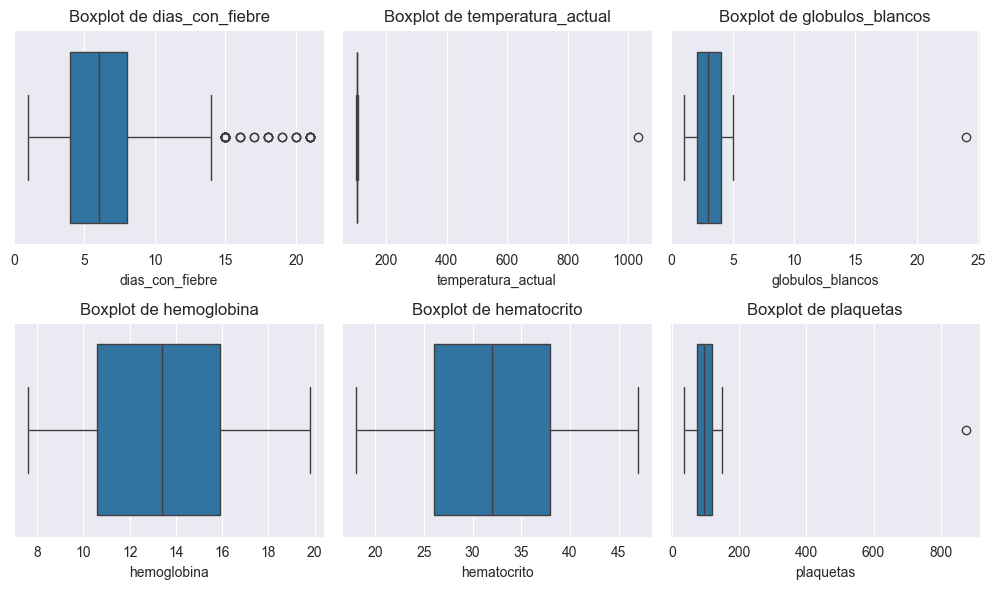

In [163]:
# Visualización de Outliers: Boxplots antes del tratamiento

# Columnas numéricas relevantes para el análisis
columnas_numericas = ['dias_con_fiebre', 'temperatura_actual', 'globulos_blancos',
                      'hemoglobina', 'hematocrito', 'plaquetas']

# Crear un gráfico de caja (boxplot) para cada una de las columnas numéricas
plt.figure(figsize=(10, 6))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()


In [164]:
# Imputar valores atípicos con la mediana
for columna in columnas_numericas:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df[columna] = np.where(df[columna] < limite_inferior, df[columna].median(), df[columna])
    df[columna] = np.where(df[columna] > limite_superior, df[columna].median(), df[columna])


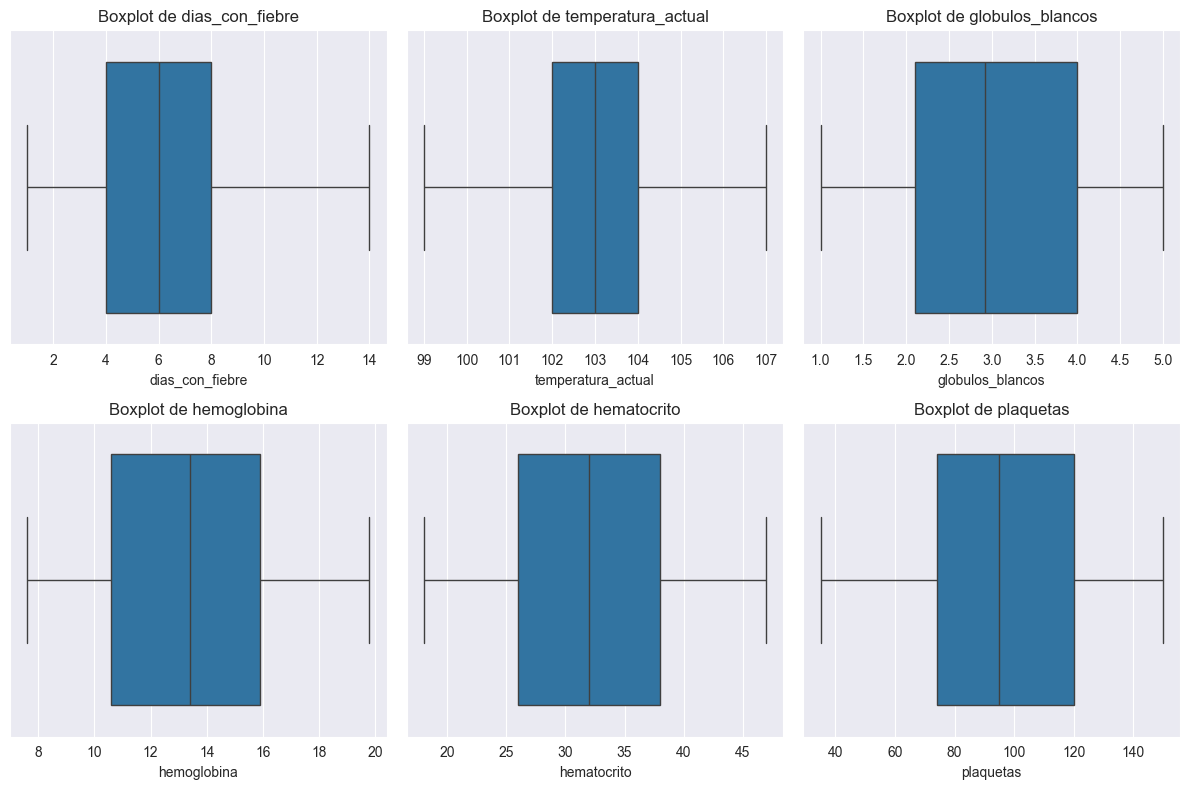

In [165]:
# Visualización de Outliers: Boxplots después del tratamiento

plt.figure(figsize=(12, 8))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[columna])
    plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()


## 2. Preparación de los datos para el modelo de Machine Learning

In [166]:
# Lista de columnas que contienen respuestas tipo "yes"/"no"
columnas_binarias = [
    'dolor_cabeza_severo',
    'dolor_detras_ojos',
    'dolor_articular_muscular',
    'sabor_metalico_boca',
    'perdida_apetito',
    'dolor_abdominal',
    'nauseas_vomitos',
    'diarrea',
    'dengue'  # también es binaria y la usaremos como variable objetivo
]

# Convertimos los valores: 'yes' -> 1 y 'no' -> 0
df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})

# Verificamos los primeros registros de estas columnas para asegurarnos que la conversión fue correcta
print(df[columnas_binarias].head())


  dolor_cabeza_severo dolor_detras_ojos dolor_articular_muscular  \
0                   1                 0                        0   
1                   0                 1                        1   
2                   1                 0                        0   
3                   1                 1                        0   
4                   1                 0                        0   

  sabor_metalico_boca perdida_apetito dolor_abdominal nauseas_vomitos diarrea  \
0                   1               1               1               0       1   
1                   0               0               0               0       0   
2                   1               1               1               1       0   
3                   0               0               0               0       0   
4                   0               0               0               1       0   

  dengue  
0      1  
1      0  
2      1  
3      0  
4      0  


C:\Users\angel\AppData\Local\Temp\ipykernel_14600\1753040816.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_14600\1753040816.py:15: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[columnas_binarias] = df[columnas_binarias].replace({'yes': 1, 'no': 0})
C:\Users\angel\AppData\Local\Temp\ipykernel_14600\1753040816.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To 

## 3. División del dataset en entrenamiento y prueba

In [167]:
# Seleccionar las columnas numéricas y las columnas de síntomas
columnas_numericas = ['dias_con_fiebre']

columnas_no_numericas = ['dolor_cabeza_severo', 'dolor_detras_ojos', 'dolor_articular_muscular',
                          'sabor_metalico_boca', 'perdida_apetito', 'dolor_abdominal',
                          'nauseas_vomitos', 'diarrea']

# Estandarización de las columnas numéricas
scaler = StandardScaler()
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])  # Solo estandariza las columnas numéricas

# X contiene solo las variables seleccionadas
X = df[['dias_con_fiebre'] + columnas_no_numericas]
y = df['dengue']  # Variable objetivo: dengue

#Dividimos el dataset: el 80% se usa para entrenar el modelo y el 20% para probarlo.
#random_state asegura que siempre se dividan igual para resultados reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Creación y entrenamiento del modelo de Machine Learning

In [168]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) # Modelo Random Forest

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5. Evaluación del modelo


Resultados con Random Forest
Accuracy: 0.9753
AUC-ROC: 0.9984
Recall (Sensibilidad): 0.9631
Tiempo de predicción: 0.0117 segundos
Especificidad: 0.9932
Tasa de Falsos Positivos (FPR): 0.0068
F1-Score: 0.9789


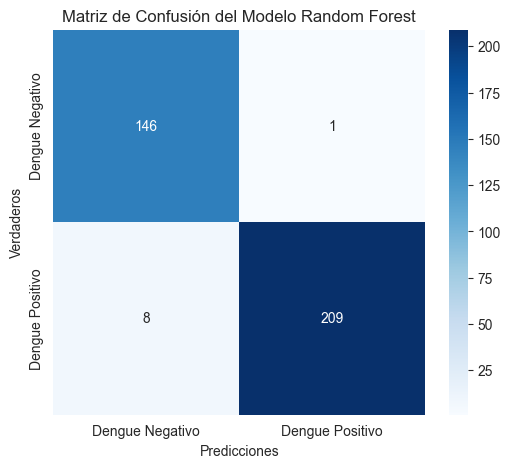

In [169]:
# Realizar predicciones con los datos de prueba
y_pred_rf = clf.predict(X_test)

# Evaluar el modelo
print("\nResultados con Random Forest")

# 1. Precisión (Accuracy)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")

# 2. AUC-ROC
y_prob = pipeline_rf.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_rf = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc_rf:.4f}")

# 3. Sensibilidad (Recall)
recall_rf = recall_score(y_test, y_pred)
print(f"Recall (Sensibilidad): {recall_rf:.4f}")

# 4. Tiempo de predicción
start_time = time.time()
y_pred = pipeline_rf.predict(X_test)
end_time = time.time()
prediction_time_rf = end_time - start_time
print(f"Tiempo de predicción: {prediction_time_rf:.4f} segundos")

# 5. Especificidad (Specificity)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity_rf = tn / (tn + fp)
print(f"Especificidad: {specificity_rf:.4f}")

# 6. Tasa de Falsos Positivos (FPR)
fpr_rf = fp / (tn + fp)
print(f"Tasa de Falsos Positivos (FPR): {fpr_rf:.4f}")

# 7. F1-Score
f1_rf = f1_score(y_test, y_pred)
print(f"F1-Score: {f1_rf:.4f}")

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dengue Negativo', 'Dengue Positivo'], yticklabels=['Dengue Negativo', 'Dengue Positivo'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión del Modelo Random Forest')
plt.show()

## 6. Clasificación del riesgo basado en las probabilidades de predicción

In [170]:
# Funcion que convierte la probabilidad de dengue en una clasificacion
def convertir_riesgo(prob):
    if prob < 0.3:
        return 'bajo'
    elif prob < 0.7:
        return 'medio'
    else:
        return 'alto'

# Aplicar la función a todas las probabilidades
riesgos = [convertir_riesgo(p) for p in y_prob]

## 7. Guardar el modelo entrenado

In [171]:
import joblib

# Guardar el modelo entrenado en un archivo para su uso posterior
joblib.dump(pipeline_rf, 'modelo_random_forest_dengue.pkl')

['modelo_random_forest_dengue.pkl']